In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

from ipywidgets import interact

get_ipython().magic('matplotlib inline')
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.titlesize'] = 8



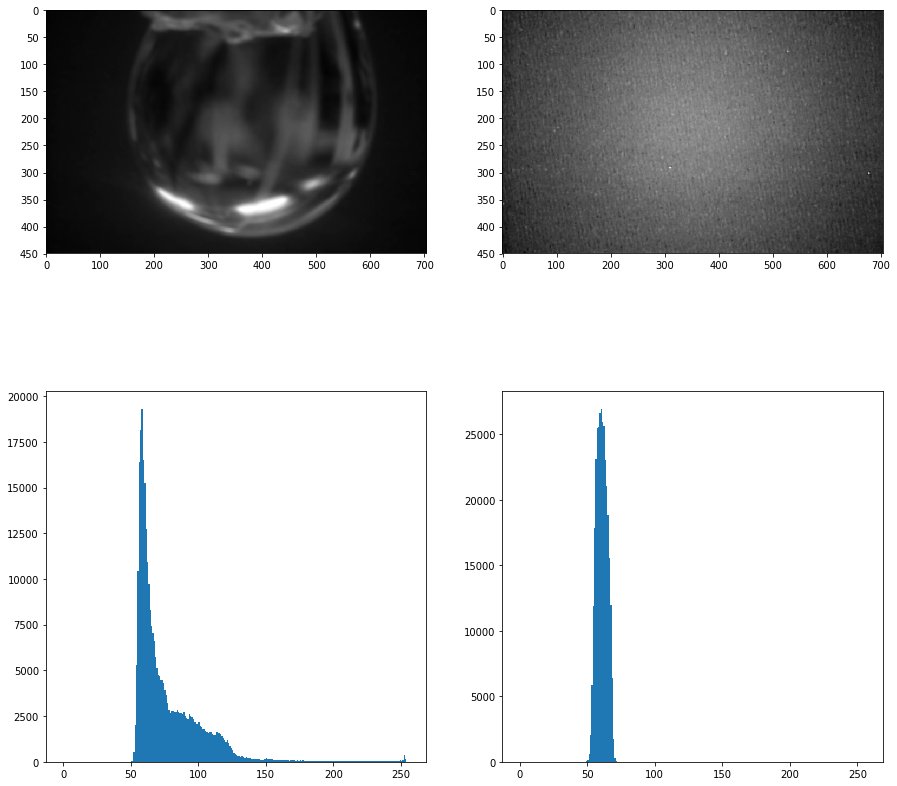

In [2]:
bg = cv2.imread('./samples/bg_nolbl.jpg', 0) 
droplet = cv2.imread('./samples/full_droplet_1.jpg', 0)

# crop the top
bg = bg[30:, :]
droplet = droplet[30:, :]

droplet = cv2.blur(droplet, ksize=(9,9))
bg = cv2.blur(bg, ksize=(3,3))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

ax1.imshow(droplet)
ax2.imshow(bg)
ax3.hist(droplet.ravel(), 256, [0, 256])
ax4.hist(bg.ravel(), 256, [0, 256])

plt.show()

### Apply thresholds

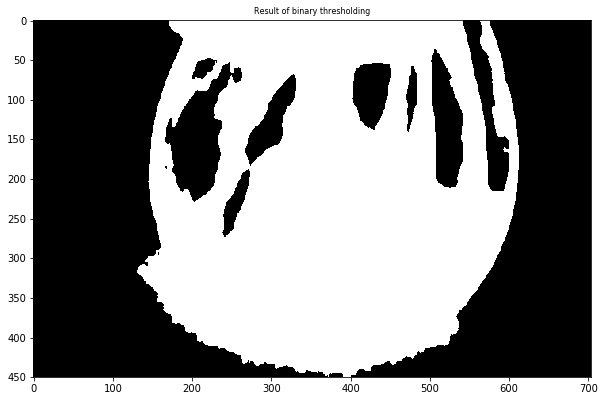

In [3]:
low_thresh = 100
high_thresh = 250

def apply_thresh(low, high):
    ret, binary = cv2.threshold(droplet, low, high, 0)
    plt.imshow(binary, cmap='gray')
    plt.title('Result of binary thresholding')
    plt.show()

interact(apply_thresh, low=(0,250), high=(0, 255));


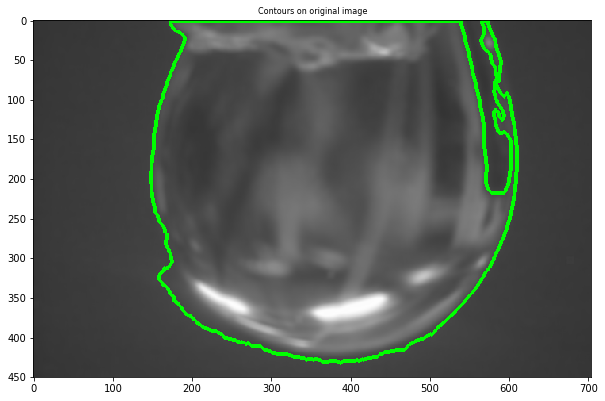

In [4]:
low_thresh = 70
high_thresh = 255

ret, binary = cv2.threshold(droplet, low_thresh, high_thresh, 0)

im2, contours, hierarchy = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
segmented_img = np.dstack((droplet, droplet, droplet))
cv2.drawContours(segmented_img, contours, -1, (0, 255, 0), 3)

plt.figure()
plt.title('Contours on original image')
plt.imshow(segmented_img)
plt.show()


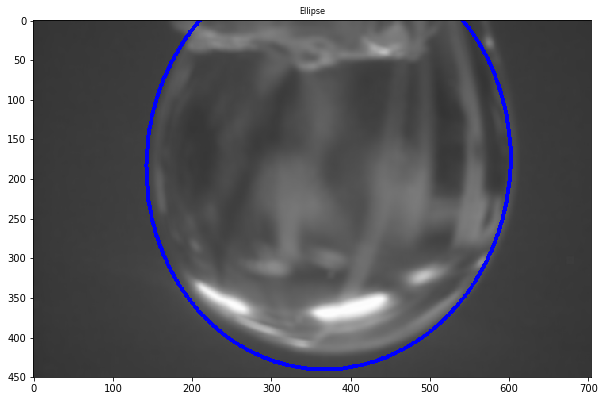

In [5]:
final = np.dstack((droplet, droplet, droplet))

for cnt in contours:
    if cnt.shape[0] > 5:
        an_ellipse = cv2.fitEllipse(cnt)
        cv2.ellipse(final, an_ellipse, (0, 0, 255), 3)

plt.figure()
plt.title('Ellipse')
plt.imshow(final)
plt.show()
